## A030193 sequence pattern

https://en.wikipedia.org/wiki/Nim

https://en.wikipedia.org/wiki/Subtract_a_square

http://oeis.org/A030193

Losing (cold) positions: 0, 2, 5, 7, 10, 12, 15, 17, 20, 22, 34, 39, 44, 52, 57, 62, 65, 67, 72, 85, 95, 109, 119, 124, 127, 130, 132, 137, 142, 147, 150, 170, 177, 180, 182, 187, 192, 197, 204, 210, 215, 238, 243, 249, 255, 257, 260, 262, 267, ....

In [1]:
import math

def subtract_perfect_squares(n):
    if n <= 0:
        return 1
    
    is_winning_case = []

    is_winning_case.append(1)
    is_winning_case.append(1)
    is_winning_case.append(0)

    for i in range(3, n+1):
        is_winning_case.append(0)
        for num in range(1, math.isqrt(i)+1):
            perfect_square = num * num
            if i - perfect_square == 0 or not is_winning_case[i - perfect_square]:
                is_winning_case[i] = 1
                break
            
    return is_winning_case

In [2]:
def is_perfect_sqrt(n):
    sqrt = math.isqrt(n)
     
    return True if sqrt**2 == n else False

### Winning position count

Until 22 the winning position count between losing position is: 2, 1, 2, 1, 2, 1, ...

After that the pattern gets random. There are smaller winning position (small island) and there are bigger winning position (big island). We get bigger winning islands as we go further in the number line.

In [3]:
positions = subtract_perfect_squares(2500)

num_winning_between_losing = []
count = 0
for i in range(1, len(positions)):
    if positions[i] == 0:
        num_winning_between_losing.append(count)
        count = 0
        continue
    count += 1

print(num_winning_between_losing)

[1, 2, 1, 2, 1, 2, 1, 2, 1, 11, 4, 4, 7, 4, 4, 2, 1, 4, 12, 9, 13, 9, 4, 2, 2, 1, 4, 4, 4, 2, 19, 6, 2, 1, 4, 4, 4, 6, 5, 4, 22, 4, 5, 5, 1, 2, 1, 4, 4, 2, 36, 4, 4, 4, 4, 2, 4, 4, 4, 18, 7, 12, 1, 4, 27, 4, 6, 4, 4, 1, 14, 37, 4, 2, 1, 2, 1, 2, 1, 31, 17, 16, 5, 4, 12, 5, 32, 10, 1, 14, 21, 1, 2, 16, 45, 16, 5, 33, 22, 4, 4, 1, 2, 1, 4, 21, 23, 4, 4, 6, 4, 38, 10, 6, 9, 2, 9, 36, 37, 9, 6, 9, 29, 27, 1, 2, 16, 54, 12, 36, 4, 2, 1, 27, 4, 14, 16, 2, 1, 16, 27, 4, 4, 12, 21, 29, 2, 6, 2, 6, 2, 31, 1, 2, 4, 22, 29, 16, 32, 1, 12, 1, 4, 7, 23, 4, 22, 37, 6, 9, 9, 7, 21, 12, 4, 16, 4, 6, 4, 50, 4, 17, 10, 25, 49, 6, 52, 1, 9, 26, 12, 4, 27, 22, 13, 6, 2, 4, 25, 6, 16, 12, 1, 52, 9, 1, 4, 44, 27]


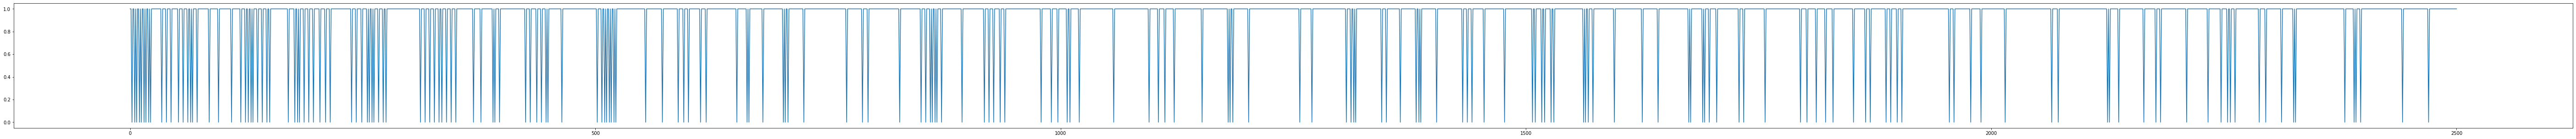

In [4]:
import matplotlib.pyplot as plt

list_number = list(range(0, len(positions)))

plt.figure(figsize=(100,5))
plt.plot(list_number, positions)
plt.show()

**x axis**: generated "substract a square" positions from 0 to *n*

**y axis**
- 1: indicates the winning position
- 0: indicates the losing position

Increasing *n* will result with more winning position than losing postion

### Create winning and losing ratios

In [5]:
import numpy as np

perfect_square_group = 1
grouped_positions = []
current_position = []
overall_ratio = []
for i in range(2, len(positions)):
    grouped_positions.append([perfect_square_group, positions[i]])
    current_position.append(positions[i])
    
    if is_perfect_sqrt(i):
        perfect_square_group = i
        
        # Calculate current overall winning and losing positions ratio
        overall_losing_count = np.count_nonzero(np.array(current_position) == 0)
        overall_winning_count = np.count_nonzero(np.array(current_position) == 1)
        overall_ratio.append(overall_losing_count / overall_winning_count)

print(grouped_positions[0:100])


[[1, 0], [1, 1], [1, 1], [4, 0], [4, 1], [4, 0], [4, 1], [4, 1], [9, 0], [9, 1], [9, 0], [9, 1], [9, 1], [9, 0], [9, 1], [16, 0], [16, 1], [16, 1], [16, 0], [16, 1], [16, 0], [16, 1], [16, 1], [16, 1], [25, 1], [25, 1], [25, 1], [25, 1], [25, 1], [25, 1], [25, 1], [25, 1], [25, 0], [25, 1], [25, 1], [36, 1], [36, 1], [36, 0], [36, 1], [36, 1], [36, 1], [36, 1], [36, 0], [36, 1], [36, 1], [36, 1], [36, 1], [36, 1], [49, 1], [49, 1], [49, 0], [49, 1], [49, 1], [49, 1], [49, 1], [49, 0], [49, 1], [49, 1], [49, 1], [49, 1], [49, 0], [49, 1], [49, 1], [64, 0], [64, 1], [64, 0], [64, 1], [64, 1], [64, 1], [64, 1], [64, 0], [64, 1], [64, 1], [64, 1], [64, 1], [64, 1], [64, 1], [64, 1], [64, 1], [64, 1], [81, 1], [81, 1], [81, 1], [81, 0], [81, 1], [81, 1], [81, 1], [81, 1], [81, 1], [81, 1], [81, 1], [81, 1], [81, 1], [81, 0], [81, 1], [81, 1], [81, 1], [81, 1], [81, 1], [100, 1]]


In [6]:
# Calculate winning and losing position count for each perfect square interval
grouped_positions_np = np.array(grouped_positions)
subarrays = np.split(grouped_positions_np[:, 1], np.unique(grouped_positions_np[:, 0], return_index=True)[1][1:])

zeros_count = []
ones_count = []

for subarray in subarrays:
    zeros_count.append(np.count_nonzero(subarray == 0))
    ones_count.append(np.count_nonzero(subarray == 1))

### Winning and losing position ratio for every perfect square

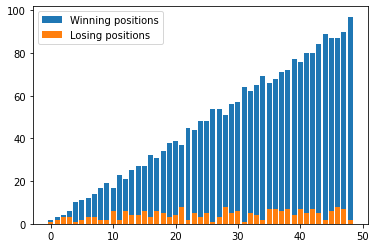

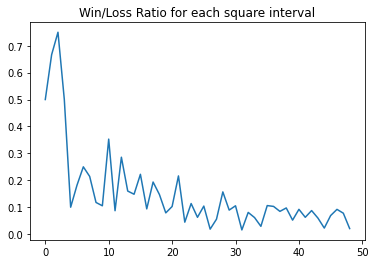

In [7]:
x = np.arange(len(zeros_count))
ratio = np.divide(np.array(zeros_count), np.array(ones_count))

winning_bar = plt.bar(x, ones_count)
losing_bar = plt.bar(x, zeros_count)
plt.legend((winning_bar[0], losing_bar[0]), ('Winning positions', 'Losing positions'))
plt.show()

plt.plot(x, ratio)
plt.title('Win/Loss Ratio for each square interval')
plt.show()

### Overall winning and losing position ratio

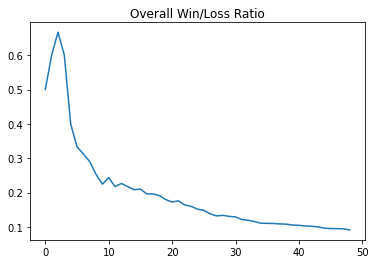

In [8]:
x = np.arange(len(overall_ratio))

plt.plot(x, overall_ratio)
plt.title('Overall Win/Loss Ratio')
plt.show()